In [1]:
import torch
                           
import DNNI
import matplotlib.pyplot as plt           # plotting
import numpy as np
import time
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
torch.set_default_tensor_type(torch.DoubleTensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name()) 

cpu


In [2]:
def f1(x):
    f = ((torch.square(x)+2*x+1+(3*x+1)*torch.sqrt(x+torch.log(x)))/
         (x*torch.sqrt(x+torch.log(x))*(x+torch.sqrt(x+torch.log(x)))))
    return f

In [4]:
device = torch.device('cpu') # less no of points: CPU performs better

F = lambda x: 2*(torch.sqrt(x+torch.log(x))+torch.log(
    x+torch.sqrt(x+torch.log(x))))
l2_all = []
for j in range(5):
    l2_error = []
    for i in range(50):
        steps=(i+1)*100
        x = torch.linspace(1,5,100).view(-1,1)
        layers = np.array([1,10,10,1])
        inn = DNNI.DNNI(layers,device)
        inn.to(device)
        inn.closure(steps=steps,x_train=x,int_f=f1,show=False)

        test_x1 = torch.linspace(1,5,85).view(-1,1) #For getting other points in the range
        test_y1 = inn(test_x1).detach().cpu().numpy()
        constant = torch.mean(F(test_x1)-test_y1)
        y = test_y1 +constant.detach().cpu().numpy() # to eliminate the constant of integration
        #print(mean_squared_error(y,F(test_x1)))
        l2_error.append(mean_squared_error(y,F(test_x1),squared=False))
    l2_all.append(l2_error) 

100%|██████████| 5000/5000 [00:04<00:00, 1213.23it/s]


Text(0.5, 0, 'Number of epochs')

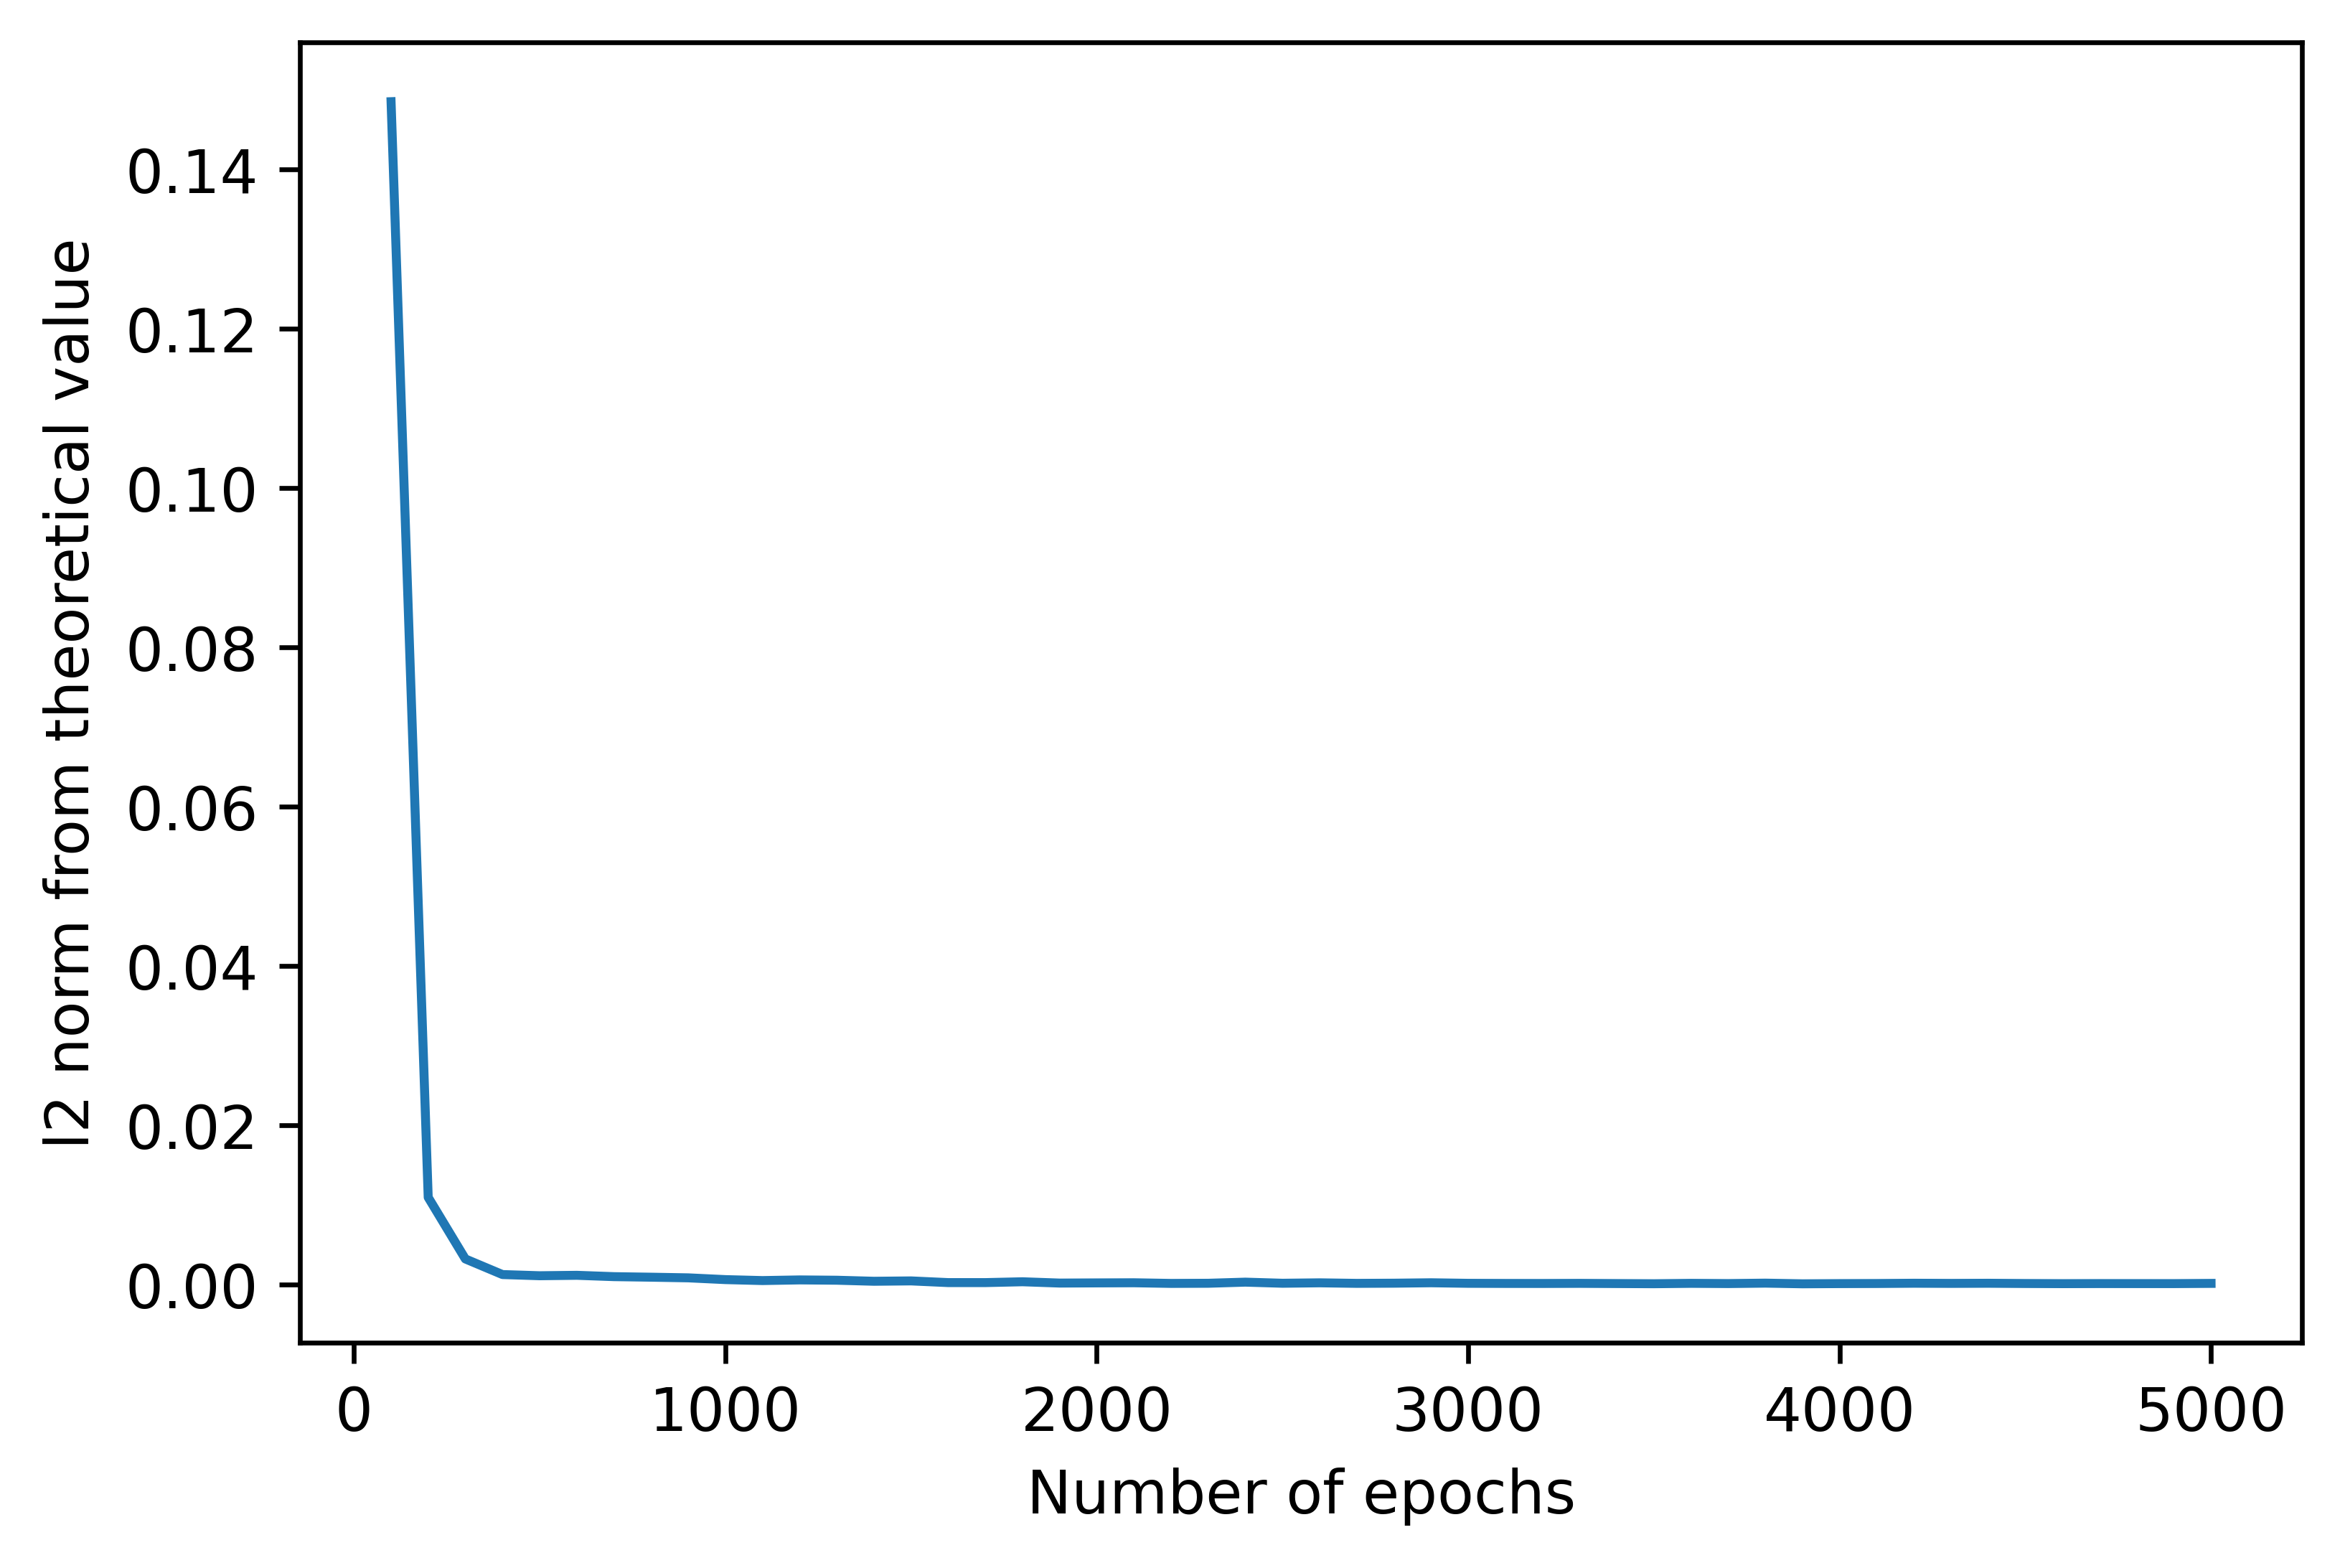

In [9]:
l2 = np.array(l2_all)
mean_l2 = (l2[0]+l2[1]+l2[2]+l2[3]+l2[4])/5


fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(np.linspace(100,5000,50),mean_l2)
plt.ylabel('l2 norm from theoretical value')
plt.xlabel('Number of epochs')
#plt.savefig('images/epoch1.png',bbox_inches='tight')

# Case 2

In [20]:
def f2(x):
    return torch.pow(x,-x)

In [23]:
l2_all = []
for j in range(5):
    l2_error = []
    for i in range(25):
        steps=(i+1)*200
        x = torch.linspace(0,10,2500).view(-1,1)
        layers = np.array([1,10,10,10,10,1])
        inn2 = DNNI.DNNI(layers,device)
        inn2.to(device)
        inn2.closure(steps=steps,x_train=x,int_f=f2,show=False)
        test_x = torch.linspace(0,10,501).view(-1,1)
        test_y = inn2(test_x).detach().cpu().numpy()
        y = (test_y[-1]-test_y[0])[0]
        actual = 1.99545595747012168979668516262699019513 #https://www.wolframalpha.com/input?i2d=true&i=Integrate%5BPower%5Bx%2C-x%5D%2C%7Bx%2C0%2C10%7D%5D
        l2_error.append(np.abs(y-actual))
    l2_all.append(l2_error)

100%|██████████| 5000/5000 [00:13<00:00, 374.56it/s]


Text(0.5, 0, 'Number of epochs')

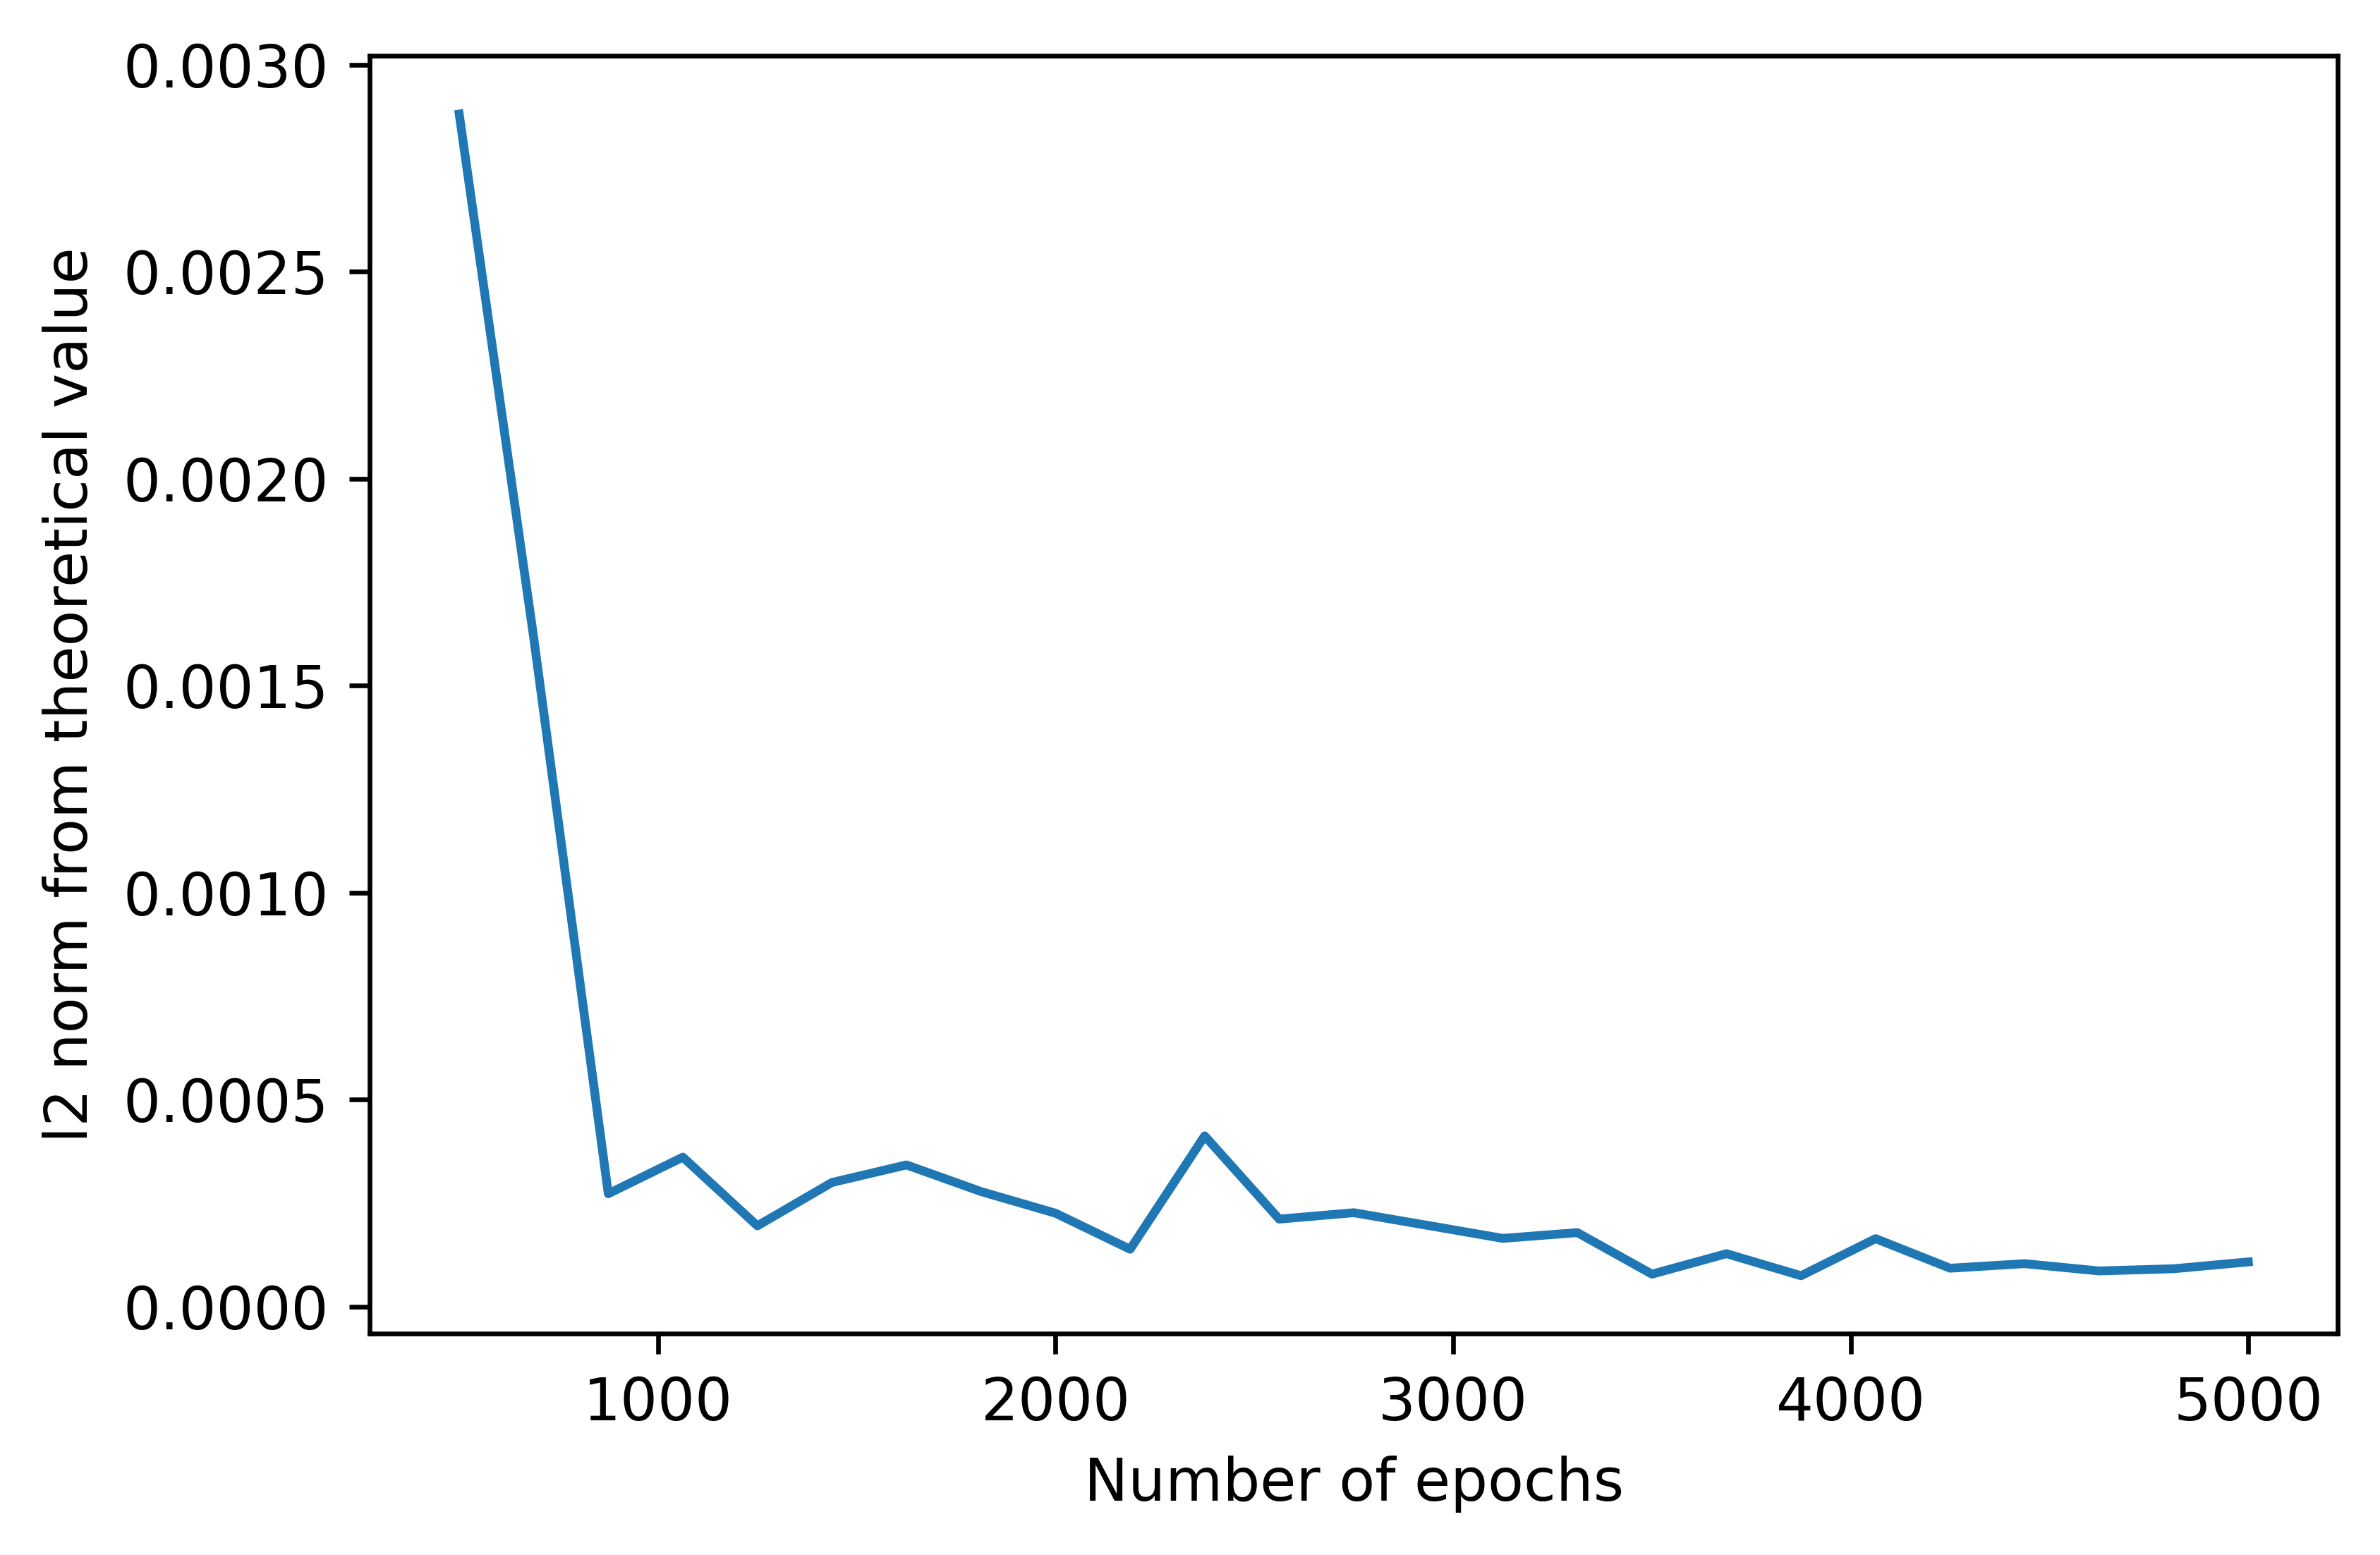

In [24]:
l2 = np.array(l2_all)
mean_l2 = (l2[0]+l2[1]+l2[2]+l2[3]+l2[4])/5

fig = plt.figure(dpi=600)
fig.patch.set_facecolor('xkcd:white')
plt.plot(np.linspace(500,5000,25),mean_l2)
plt.ylabel('l2 norm from theoretical value')
plt.xlabel('Number of epochs')
#plt.savefig('images/epoch2.png',bbox_inches='tight')